In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'numpy'

In [6]:
sales = pd.read_csv('supermarket_sales - Sheet1.csv')

In [ ]:
sales.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [7]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

the 'data' datatype is an object, needs to be datetime

In [8]:
# change Date to datetime
sales['date'] = pd.to_datetime(sales['Date'])
sales['date'] = pd.to_datetime(sales['date'])

# create new columns for the date
sales['day'] = (sales['date']).dt.day
sales['month'] = (sales['date']).dt.month
sales['year'] = (sales['date']).dt.year

# change Time to datetime
sales['Time'] = pd.to_datetime(sales['Time'])
sales['Hour'] = (sales['Time']).dt.hour


<ipython-input-8-b8e77c54db18>:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sales['Time'] = pd.to_datetime(sales['Time'])


In [9]:
sales.describe()

,Unit price,Quantity,Tax 5%,Total,Time,cogs,gross margin percentage,gross income,Rating,date,day,month,year,Hour
count,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000.00000,1.000000e+03,1000.000000,1000.00000,1000,1000.000000,1000.000000,1000.0,1000.000000
mean,55.672130,5.510000,15.379369,322.966749,2025-02-11 15:24:41.880000,307.58738,4.761905e+00,15.379369,6.97270,2019-02-14 00:05:45.600000,15.256000,1.993000,2019.0,14.910000
min,10.080000,1.000000,0.508500,10.678500,2025-02-11 10:00:00,10.17000,4.761905e+00,0.508500,4.00000,2019-01-01 00:00:00,1.000000,1.000000,2019.0,10.000000
25%,32.875000,3.000000,5.924875,124.422375,2025-02-11 12:43:00,118.49750,4.761905e+00,5.924875,5.50000,2019-01-24 00:00:00,8.000000,1.000000,2019.0,12.000000
50%,55.230000,5.000000,12.088000,253.848000,2025-02-11 15:19:00,241.76000,4.761905e+00,12.088000,7.00000,2019-02-13 00:00:00,15.000000,2.000000,2019.0,15.000000
75%,77.935000,8.000000,22.445250,471.350250,2025-02-11 18:15:00,448.90500,4.761905e+00,22.445250,8.50000,2019-03-08 00:00:00,23.000000,3.000000,2019.0,18.000000
max,99.960000,10.000000,49.650000,1042.650000,2025-02-11 20:59:00,993.00000,4.761905e+00,49.650000,10.00000,2019-03-30 00:00:00,31.000000,3.000000,2019.0,20.000000
std,26.494628,2.923431,11.708825,245.885335,NaN,234.17651,6.131498e-14,11.708825,1.71858,NaN,8.693563,0.835254,0.0,3.186857


finding unique values for columns with the object datatype

In [10]:
categorical_columns = [cname for cname in sales.columns if sales[cname].dtype == "object"]

categorical_columns

['Invoice ID',
 'Branch',
 'City',
 'Customer type',
 'Gender',
 'Product line',
 'Date',
 'Payment']

In [11]:
print(" unique values in Branch: {0}".format(len(sales['Branch'].unique().tolist())))
print(" unique values in City: {0}".format(len(sales['City'].unique().tolist())))
print(" unique values in Customer Type: {0}".format(len(sales['Customer type'].unique().tolist())))
print(" unique values in Gender: {0}".format(len(sales['Gender'].unique().tolist())))
print(" unique values in Product Line: {0}".format(len(sales['Product line'].unique().tolist())))
print(" unique values in Payment: {0}".format(len(sales['Payment'].unique().tolist())))

 unique values in Branch: 3
 unique values in City: 3
 unique values in Customer Type: 2
 unique values in Gender: 2
 unique values in Product Line: 6
 unique values in Payment: 3


create a gid consisiting of gender count // slightly more female than male.

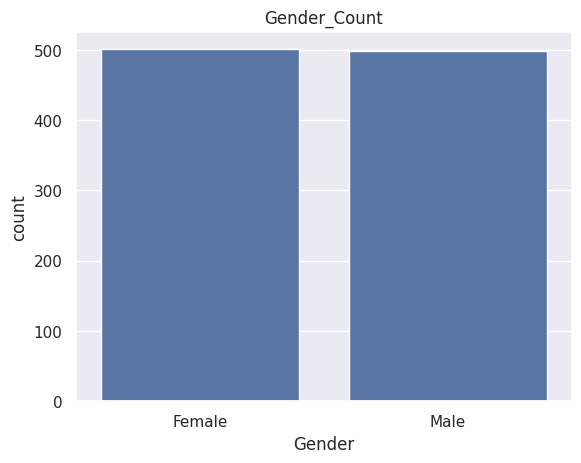

In [27]:
genderCount  = sns.countplot(x="Gender", data =sales).set_title("Gender_Count")

creating a box plot of the ratings of all 3 banches in the dataset // seems as branch B has the lowest rating between the branches

Text(0.5, 1.0, 'Ratings by Branch')

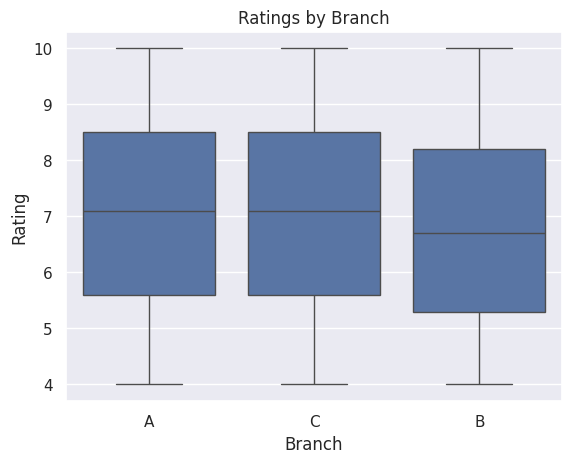

In [36]:
sns.boxplot(x="Branch", y = "Rating" ,data =sales).set_title("Ratings by Branch")

creating a graph displaying the sales per hour in the company

Text(0.5, 1.0, 'Product Sales per Hour')

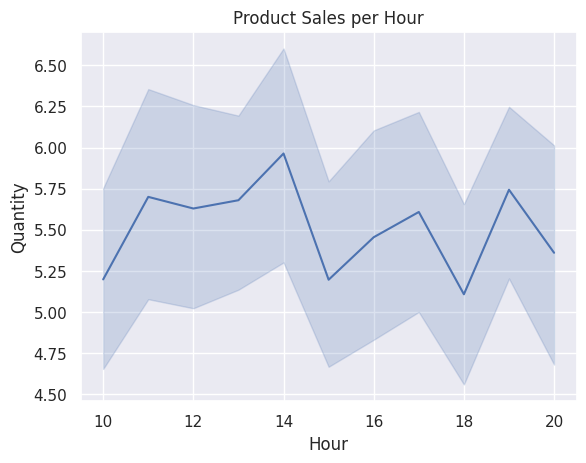

In [37]:
sns.lineplot(x="Hour",  y = 'Quantity',data =sales).set_title("Product Sales per Hour")

Extended to show the sales per hour using a monthly timeline.

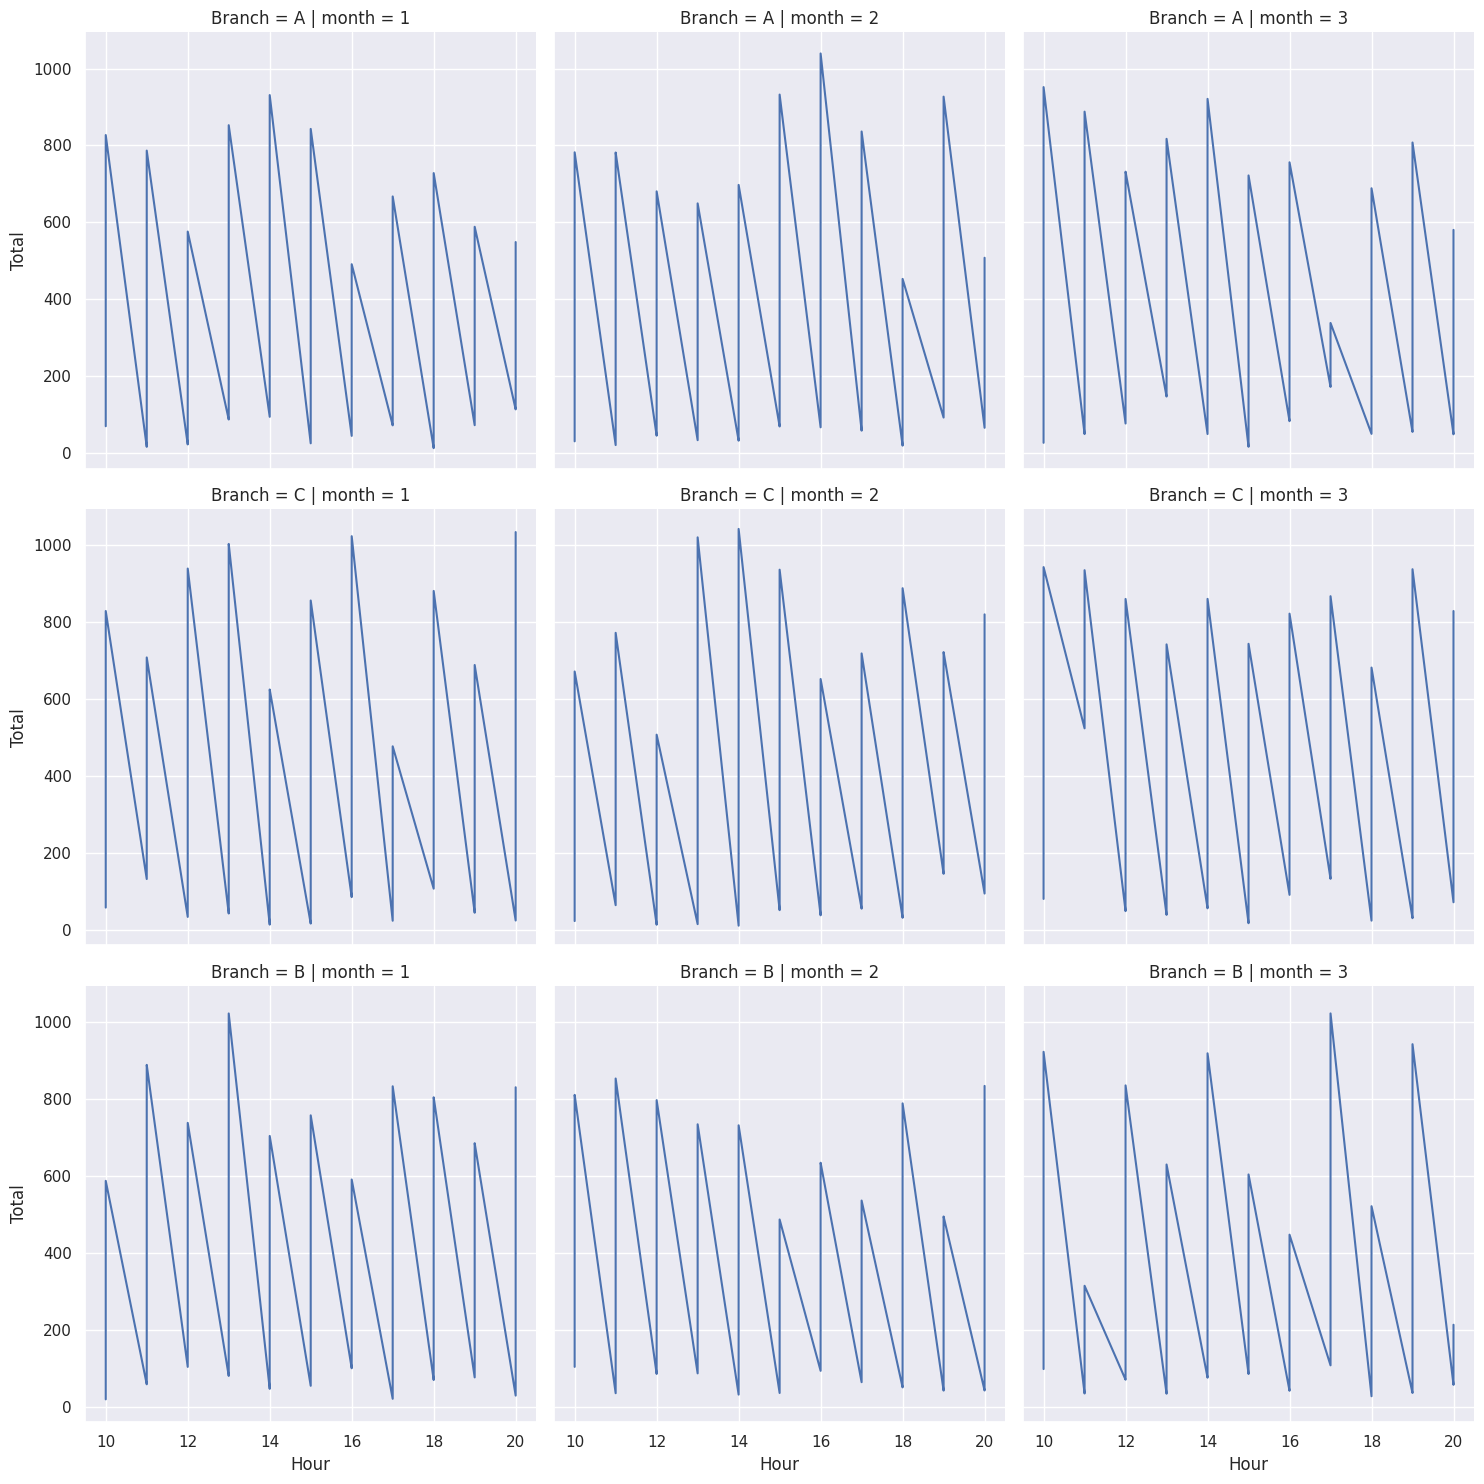

In [38]:
sns.relplot(x="Hour",  y = 'Total', col= 'month' , row= 'Branch', estimator = None, kind="line", data =sales)

Changed the plot to show the branch sales by the hour, using a monthly timescale.

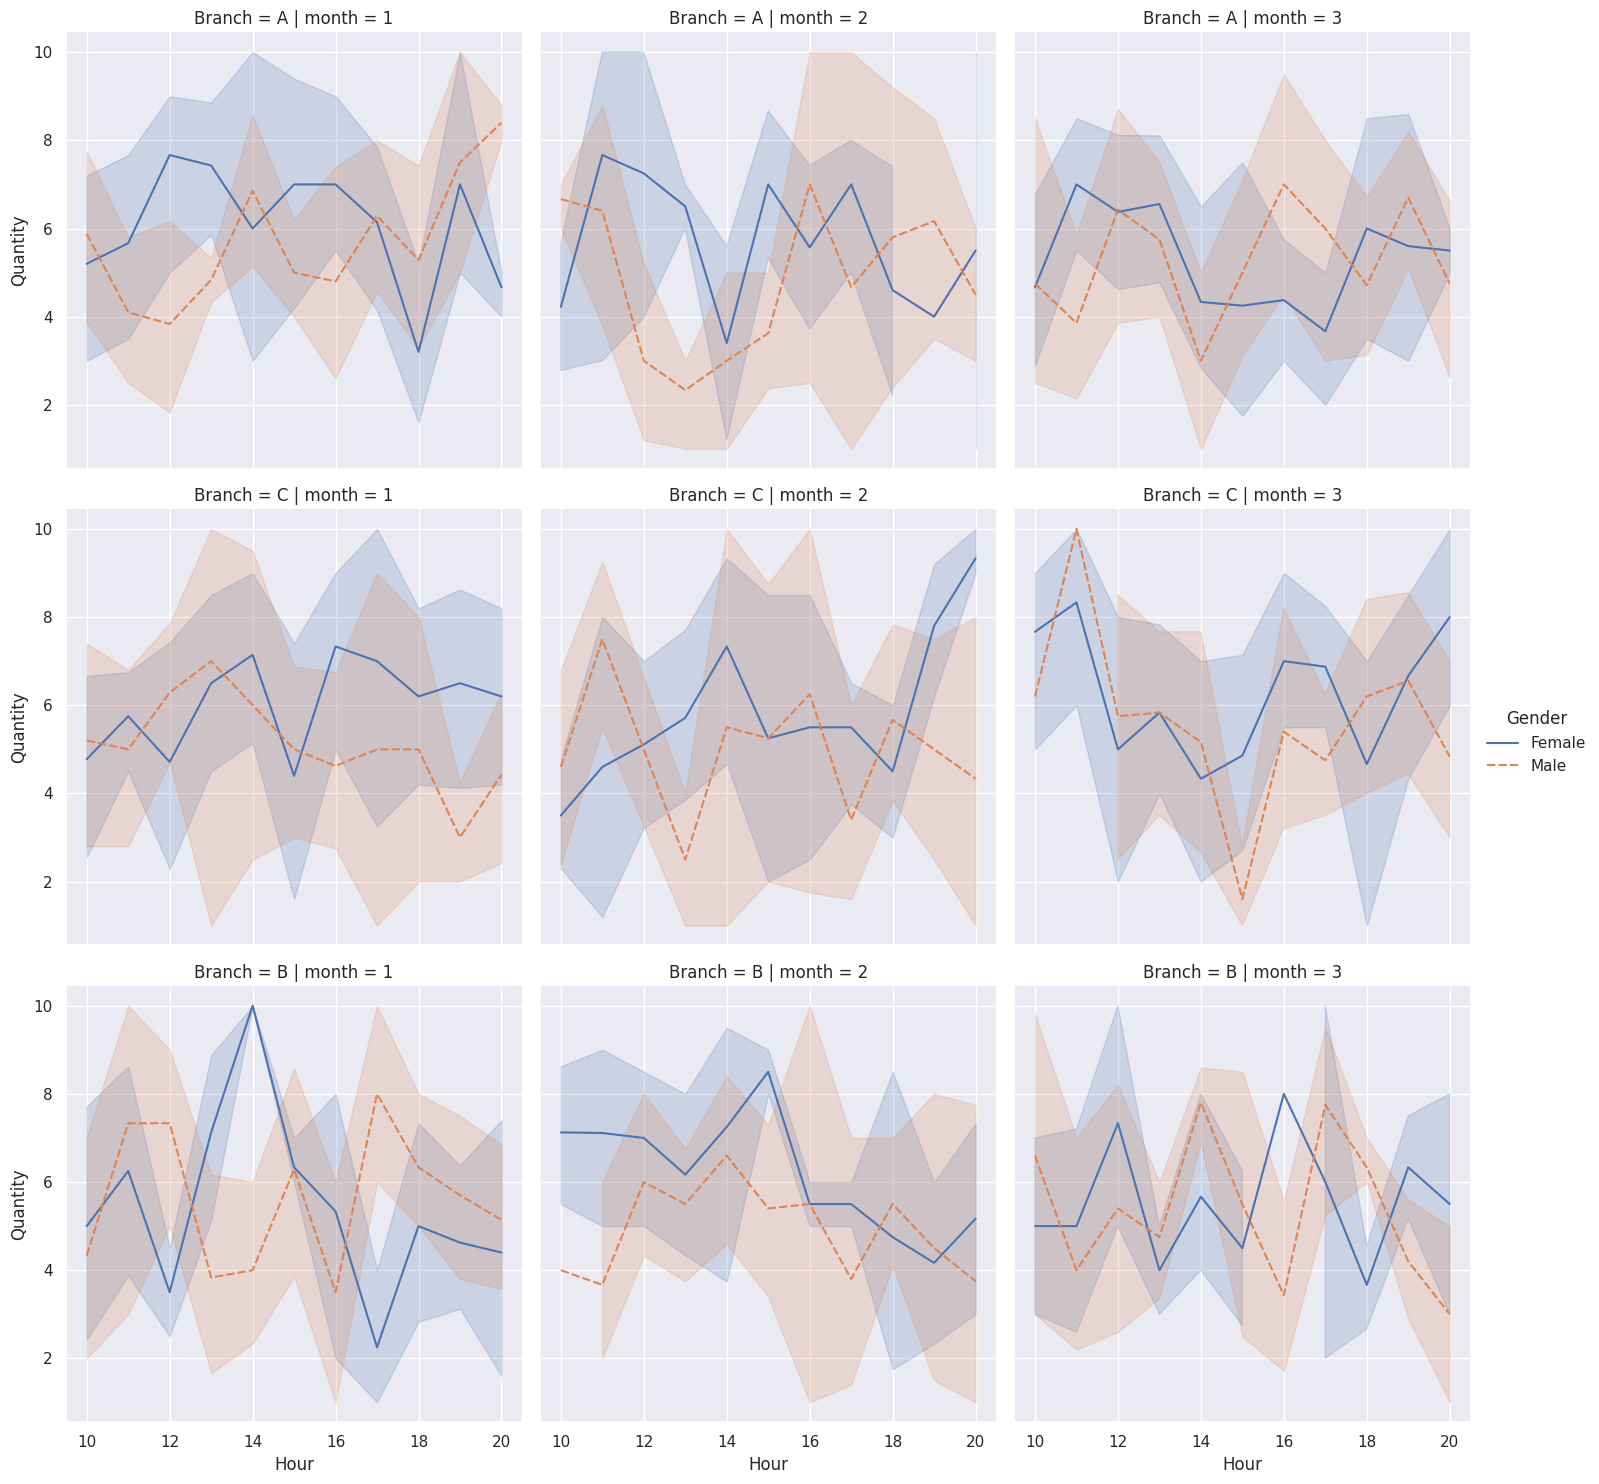

In [35]:
sns.relplot(x="Hour",  y = 'Quantity',col = "month", row = 'Branch', hue="Gender", style="Gender", kind = "line", data =sales)

# Product Analysis

Creating a boxplot to analyse the performance of different product lines // The graph shows that the 'Health and beauty' , 'Electronic accessories' , 'Sports and travel' and 'Food and beverage' have a better average sales quantity

<Axes: xlabel='Quantity', ylabel='Product line'>

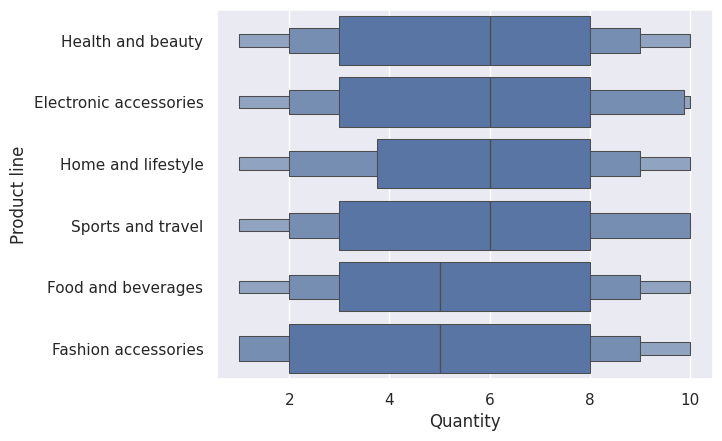

In [39]:
sns.boxenplot(y = 'Product line', x = 'Quantity', data=sales )

Show the amount of sales per product line // 'Fashion accessories' has the highest sales while 'Health and beauty' has the lowest

<Axes: xlabel='count', ylabel='Product line'>

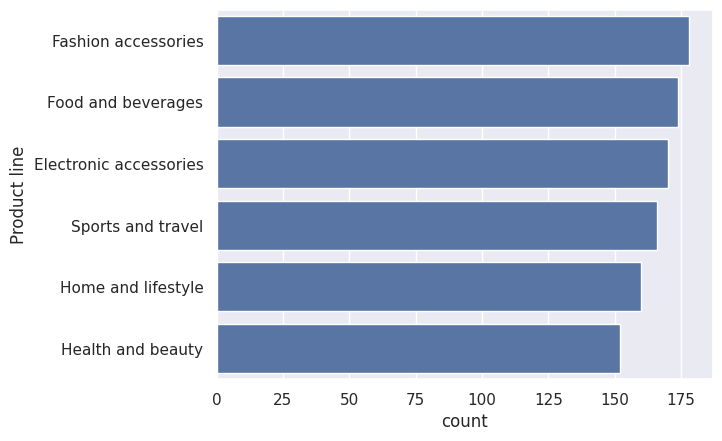

In [40]:
sns.countplot(y = 'Product line', data=sales, order = sales['Product line'].value_counts().index )

A boxplot showing the ratings between the different product lines